# 神经网络

神经网络是一个函数带参数的函数，通过输入、输出数据来拟合函数中的参数。

现在有三个数据

$(x_1,y_1)=(0,0)$, $(x_2,y_2)=(1,1.1)$, $(x_3,y_3)=(2.1,2)$

这三个测量数据，我们可以看出它大概是个线性趋势，只不过有一些误差，如果我们假设模型是简单的线性模型 $f(x)=ax+b$, 想通过这个模型最好地拟合这三个数据。希望这个模型在的$x$上，可以准确地给出对应的$y$。

我们可以让拟合的结果均方误差最小。即

$\arg\min_{(a,b)} \frac{1}{3}\sum_{i=1}^3(f(x_i)-y_i)^2$

通过一阶导为0，可以求出$a$和$b$。人工智能或神经网络是同样的过程，只不过是更复杂一些的模型和优化方法。

## 任务
先考虑不同的任务，比如图像分类，那$x$就是一张图像，是一个矩阵，$y$是类别的编码。比如翻译，那是语言生成任务，$x$是单词的编码序列，$y$是目标语言单词的编码序列。

## 模型
神经网络像堆积木一样，有着各种各样的模型，比较基础的是多层感知机或全联接神经网络

$a^{(i)}_j = \sum w^{(i-1)}_{j0} x_0^{(i-1)}+ ... + w^{(i-1)}_{jN^{(i-1)}} x_{N^{(i-1)}}^{(i-1)} + b^{(i-1)}_j$

$a^{(i)}_j = \sigma(x^{(i)}_j)$

其中，$\sigma$为激活函数，用来提供模型中的非线性。全联接神经网络其实是一个高维分段线性函数，所以可以逼近任意函数。只要模型足够大，数据足够多，就可以以任意精度逼近连续函数。

## 激活函数
常用的激活函数包括$sigmoid=\frac{1}{1+e^{-x}}$、$relu=\max(0,x)$等。$sigmoid$可以很好地将输出限制在$(0,1)$之间，但是在神经网络层数太多的时候，会导致梯度消失，增加模型训练难度。

# 练习
本次作业要实现地是神经网络中的自动编码器，将一个$1\times 16$的one hot向量，自动编码成一个$(0,1)$之间的实数。实现地方法是先将其编码为一个$(0,1)$之间的数，再解码成$1\times 16$的向量，使解码之后的向量与原向量一样。

例如 $x=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]$, $g(x)\in (0,1)$, $f(x) = h(g(x)) \in (0,1)^{16}$

这里 $f(x)$就是神经网络，$g(x)$是编码器，它将$x$编码为一个实数，$h(\dot)$是一个解码器，他将编码解码为$(0,1)^{16}$的一个数。我们希望通过另$f(x)\approx x$，实现对$x$的自动编码。

d:\APP\Anaconda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


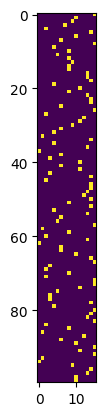

In [3]:
# import package for deep learning
import torch
# import package for visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# generate data
N_samples = 10000 # num of samples 
N_dim = 16 # number of dimension

# initialize as zero vectors
x = torch.zeros(N_samples, N_dim)
# for each row, randomly choose one of the dimension and set to one
idx = torch.randint(0, N_dim, (N_samples,))
x[torch.arange(N_samples),idx] = 1

# visualize the top 100 samples
plt.imshow(x[:100,:])

# for the autoencoder, we need to fit the input itself. Thus, we create the dataset as (x,y) <= (x,x)
dataset = (x,x)

# create a dataloader to automaticly prepare the data batches.
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

In [4]:
# Creating a PyTorch class
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 1),
            torch.nn.ReLU(),
            # --------- Your code here --------- 
            # ...
            # for details of nn.sequential please refer https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html 
            # for neural network layers and activations, please refer https://pytorch.org/docs/stable/nn.html
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Softmax activation function
        # outputs the value between 0 and 1
        self.decoder = torch.nn.Sequential(
            # Your can also modify the code below
            # --------- Your code here --------- 
            torch.nn.Linear(1, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.Softmax()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        encoded = self.encoder(x)
        return encoded

In [22]:
# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

epoch:0 loss:0.05873
epoch:100 loss:0.05853
epoch:200 loss:0.05189
epoch:300 loss:0.04203
epoch:400 loss:0.02771
epoch:500 loss:0.01791
epoch:600 loss:0.01358
epoch:700 loss:0.00906
epoch:800 loss:0.00452
epoch:900 loss:0.00081
epoch:1000 loss:0.00033
epoch:1100 loss:0.00019
epoch:1200 loss:0.00012
epoch:1300 loss:0.00009
epoch:1400 loss:0.00007
epoch:1500 loss:0.00005
epoch:1600 loss:0.00004
epoch:1700 loss:0.00003
epoch:1800 loss:0.00003
epoch:1900 loss:0.00002
epoch:2000 loss:0.00002
epoch:2100 loss:0.00002
epoch:2200 loss:0.00002
epoch:2300 loss:0.00001
epoch:2400 loss:0.00001
epoch:2500 loss:0.00001
epoch:2600 loss:0.00001
epoch:2700 loss:0.00001
epoch:2800 loss:0.00001
epoch:2900 loss:0.00001
epoch:3000 loss:0.00001
epoch:3100 loss:0.00001
epoch:3200 loss:0.00001
epoch:3300 loss:0.00000
epoch:3400 loss:0.00000
epoch:3500 loss:0.00000
epoch:3600 loss:0.00000
epoch:3700 loss:0.00000
epoch:3800 loss:0.00000
epoch:3900 loss:0.00000
epoch:4000 loss:0.00000
epoch:4100 loss:0.00000
epoc

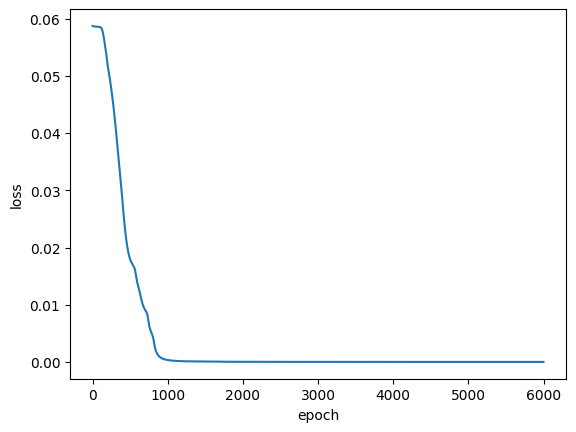

In [23]:
epochs = 6000
outputs = []
losses = []
for epoch in range(epochs): 
    total_loss=0.
    for (image, _) in loader:
       
        # Output of Autoencoder
        reconstructed = model(image)
               
        # Calculating the loss function
        loss = loss_function(reconstructed, image)
        
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss+=loss.detach().numpy()

        # --------- Your code here ---------  
    if epoch%100==0:
        print(f'epoch:{epoch} loss:{total_loss:.5f}')
    losses.append(total_loss)
plt.plot([i for i in range(len(losses))],losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
        # print the loss every 100 epochs,
        # print(loss)
        # the loss should be decreasing to a small number

In [24]:
# model output
recon = model(x).detach().numpy()

Text(0.5, 1.0, 'reconstructed data')

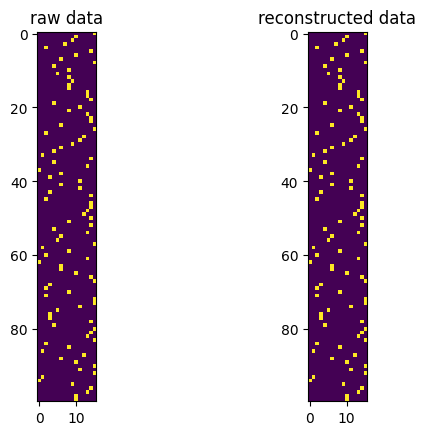

In [25]:
# --------- Your code here --------- 
# visualize the reconstructed top 100 samples, and the original top 100 samples side-by-side
plt.subplot(1,2,1)
plt.imshow(x[:100,:])
plt.title('raw data')
plt.subplot(1,2,2)
plt.imshow(recon[:100,:])
plt.title('reconstructed data')
# they should look like ...


In [26]:
# print the code book
x = torch.eye(N_dim)
code = model.encode(x)
print(code)

tensor([[  6.4532],
        [ 21.3054],
        [ 83.6099],
        [ 10.3288],
        [  3.3990],
        [ 16.3731],
        [  4.8375],
        [ 28.0449],
        [ 48.3406],
        [ 63.3438],
        [109.3261],
        [  0.0000],
        [ 36.9794],
        [  1.9169],
        [  8.1661],
        [ 13.0285]], grad_fn=<ReluBackward0>)


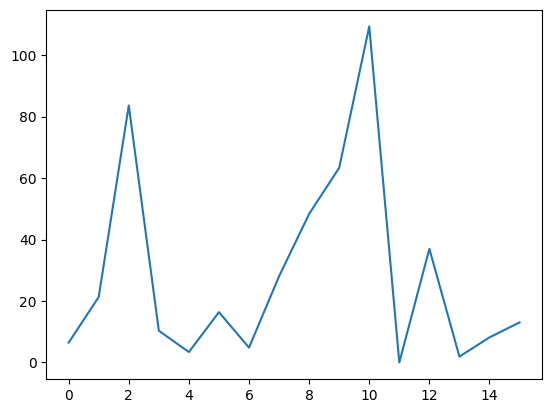

In [27]:
# plot the code book
plt.plot(code.detach().numpy())